# **Import Library**

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile, os
import shutil 
import glob

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.utils import np_utils

In [ ]:
# input kaggle credentials
from google.colab import files
files.upload()

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Datasetnya mau pakai yang mana?
1. https://www.kaggle.com/lavaman151/plantifydr-dataset
2. https://www.kaggle.com/vipoooool/new-plant-diseases-dataset
3. https://data.mendeley.com/datasets/tywbtsjrjv/1

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

# **Rename and Move Dataset Folder**

In [ ]:
# run once
local_zip = 'new-plant-diseases-dataset.zip'
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall('/')

In [ ]:
os.rename('/New Plant Diseases Dataset(Augmented)', '/plant')
os.rename('/plant/New Plant Diseases Dataset(Augmented)', '/plant/plant')

In [ ]:
file = os.listdir('/plant/plant')
for fn in file:
  original = r'/plant/plant/{}'.format(fn)
  target = r'/plant/{}'.format(fn)
  shutil.move(original,target)

# **[Potato]**

## **Only take potato**

In [ ]:
plant_use = ['Potato']

for plant in plant_use:
  print(len(glob.glob("/plant/train/{}*".format(plant))))

3


In [ ]:
base_dir = '/plant'
potato_train_dir = os.path.join(base_dir, 'train_potato')
potato_validation_dir = os.path.join(base_dir, 'valid_potato')

In [ ]:
if not os.path.exists(potato_train_dir):
    os.mkdir(potato_train_dir)

plant_use = ['Potato']
for plant in plant_use:
  dir = glob.glob("/plant/train/{}*".format(plant))
  for i in range(len(dir)):
    original = dir[i]
    target = "/plant/train_potato/{}".format(original[13:])
    shutil.move(original,target)

In [ ]:
if not os.path.exists(potato_validation_dir):
    os.mkdir(potato_validation_dir)

plant_use = ['Potato']
for plant in plant_use:
  dir = glob.glob("/plant/valid/{}*".format(plant))
  for i in range(len(dir)):
    original = dir[i]
    target = "/plant/valid_potato/{}".format(original[13:])
    shutil.move(original,target)

## **Visualization**

In [ ]:
potato = os.listdir(potato_train_dir)
potato

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

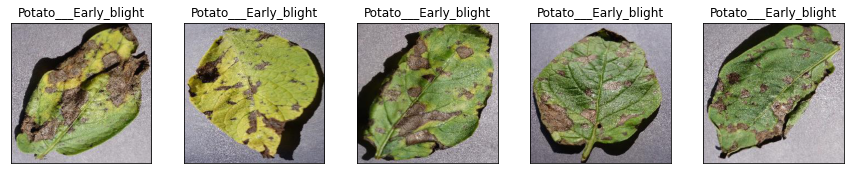

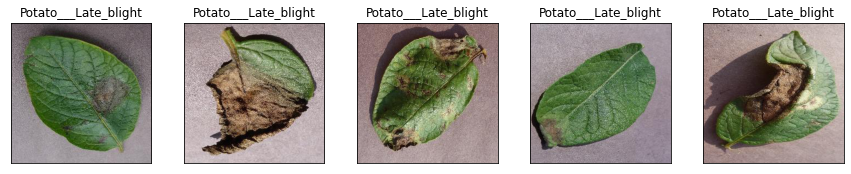

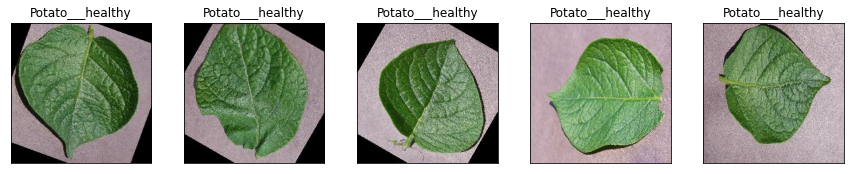

In [ ]:
import matplotlib.image as mpimg
import random

numb_of_pic = 5
random.seed()

for fn in potato:
  rand_F = []
  for i in range(numb_of_pic):
    rand_F.append(random.randint(0, len(os.listdir('{}/{}'.format(potato_train_dir, fn)))))

  F_listdir = [os.listdir('{}/{}'.format(potato_train_dir, fn))[i] for i in rand_F]
  F_listdir = [os.path.join('{}/{}'.format(potato_train_dir, fn), fname) for fname in F_listdir]

  plt.figure(figsize=(15, 15))
  for i, image in enumerate(F_listdir):
    img = mpimg.imread(image)
    ax = plt.subplot(5, 5, i + 1)
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(fn)

## **Augmentation**

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    fill_mode = 'nearest'
                    )
 
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        potato_train_dir,
        target_size=(224, 224),  
        batch_size=64,
        class_mode='categorical',
        shuffle=True) # label data berupa kategori
 
validation_generator = test_datagen.flow_from_directory(
        potato_validation_dir,
        target_size=(224, 224), 
        batch_size=64, 
        class_mode='categorical') # label data berupa kategori

Found 5702 images belonging to 3 classes.
Found 1426 images belonging to 3 classes.


## **Training**

### **No Augmentation**

In [ ]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    potato_train_dir, 
    batch_size=64, 
    image_size=(224, 224),
    seed=42,
    shuffle=True
)
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    potato_validation_dir, 
    batch_size=64, 
    image_size=(224, 224),
    seed=42
)

Found 5702 files belonging to 3 classes.
Found 1426 files belonging to 3 classes.


In [ ]:
# defining cnn
model_potato = tf.keras.models.Sequential([
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model_potato.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
history_1 = model_potato.fit(training_ds, validation_data = validation_ds, epochs = 10)

Epoch 1/10
90/90 [==============================] - 24s 234ms/step - loss: 16.0916 - accuracy: 0.5749 - val_loss: 0.5526 - val_accuracy: 0.7602
Epoch 2/10
90/90 [==============================] - 21s 228ms/step - loss: 0.4769 - accuracy: 0.7920 - val_loss: 0.5412 - val_accuracy: 0.7609
Epoch 3/10
90/90 [==============================] - 21s 226ms/step - loss: 0.3829 - accuracy: 0.8401 - val_loss: 0.2975 - val_accuracy: 0.8773
Epoch 4/10
90/90 [==============================] - 21s 228ms/step - loss: 0.2700 - accuracy: 0.8935 - val_loss: 0.2485 - val_accuracy: 0.8990
Epoch 5/10
90/90 [==============================] - 21s 228ms/step - loss: 0.2057 - accuracy: 0.9204 - val_loss: 0.1968 - val_accuracy: 0.9187
Epoch 6/10
90/90 [==============================] - 21s 227ms/step - loss: 0.1851 - accuracy: 0.9342 - val_loss: 0.1074 - val_accuracy: 0.9670
Epoch 7/10
90/90 [==============================] - 21s 227ms/step - loss: 0.1056 - accuracy: 0.9625 - val_loss: 0.1084 - val_accuracy: 0.957

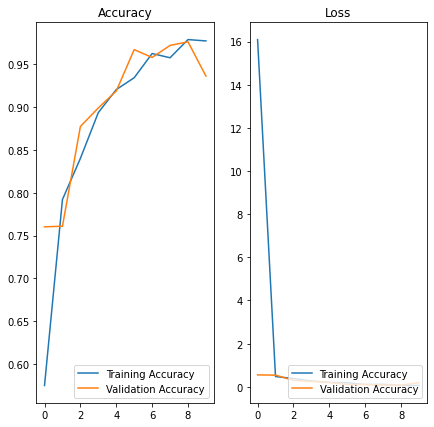

In [ ]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Accuracy')
plt.plot(epochs_range, val_loss, label='Validation Accuracy')
plt.title('Loss')
plt.legend(loc='lower right')
plt.show()

**Model Evaluation**

In [ ]:
class_names = validation_ds.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

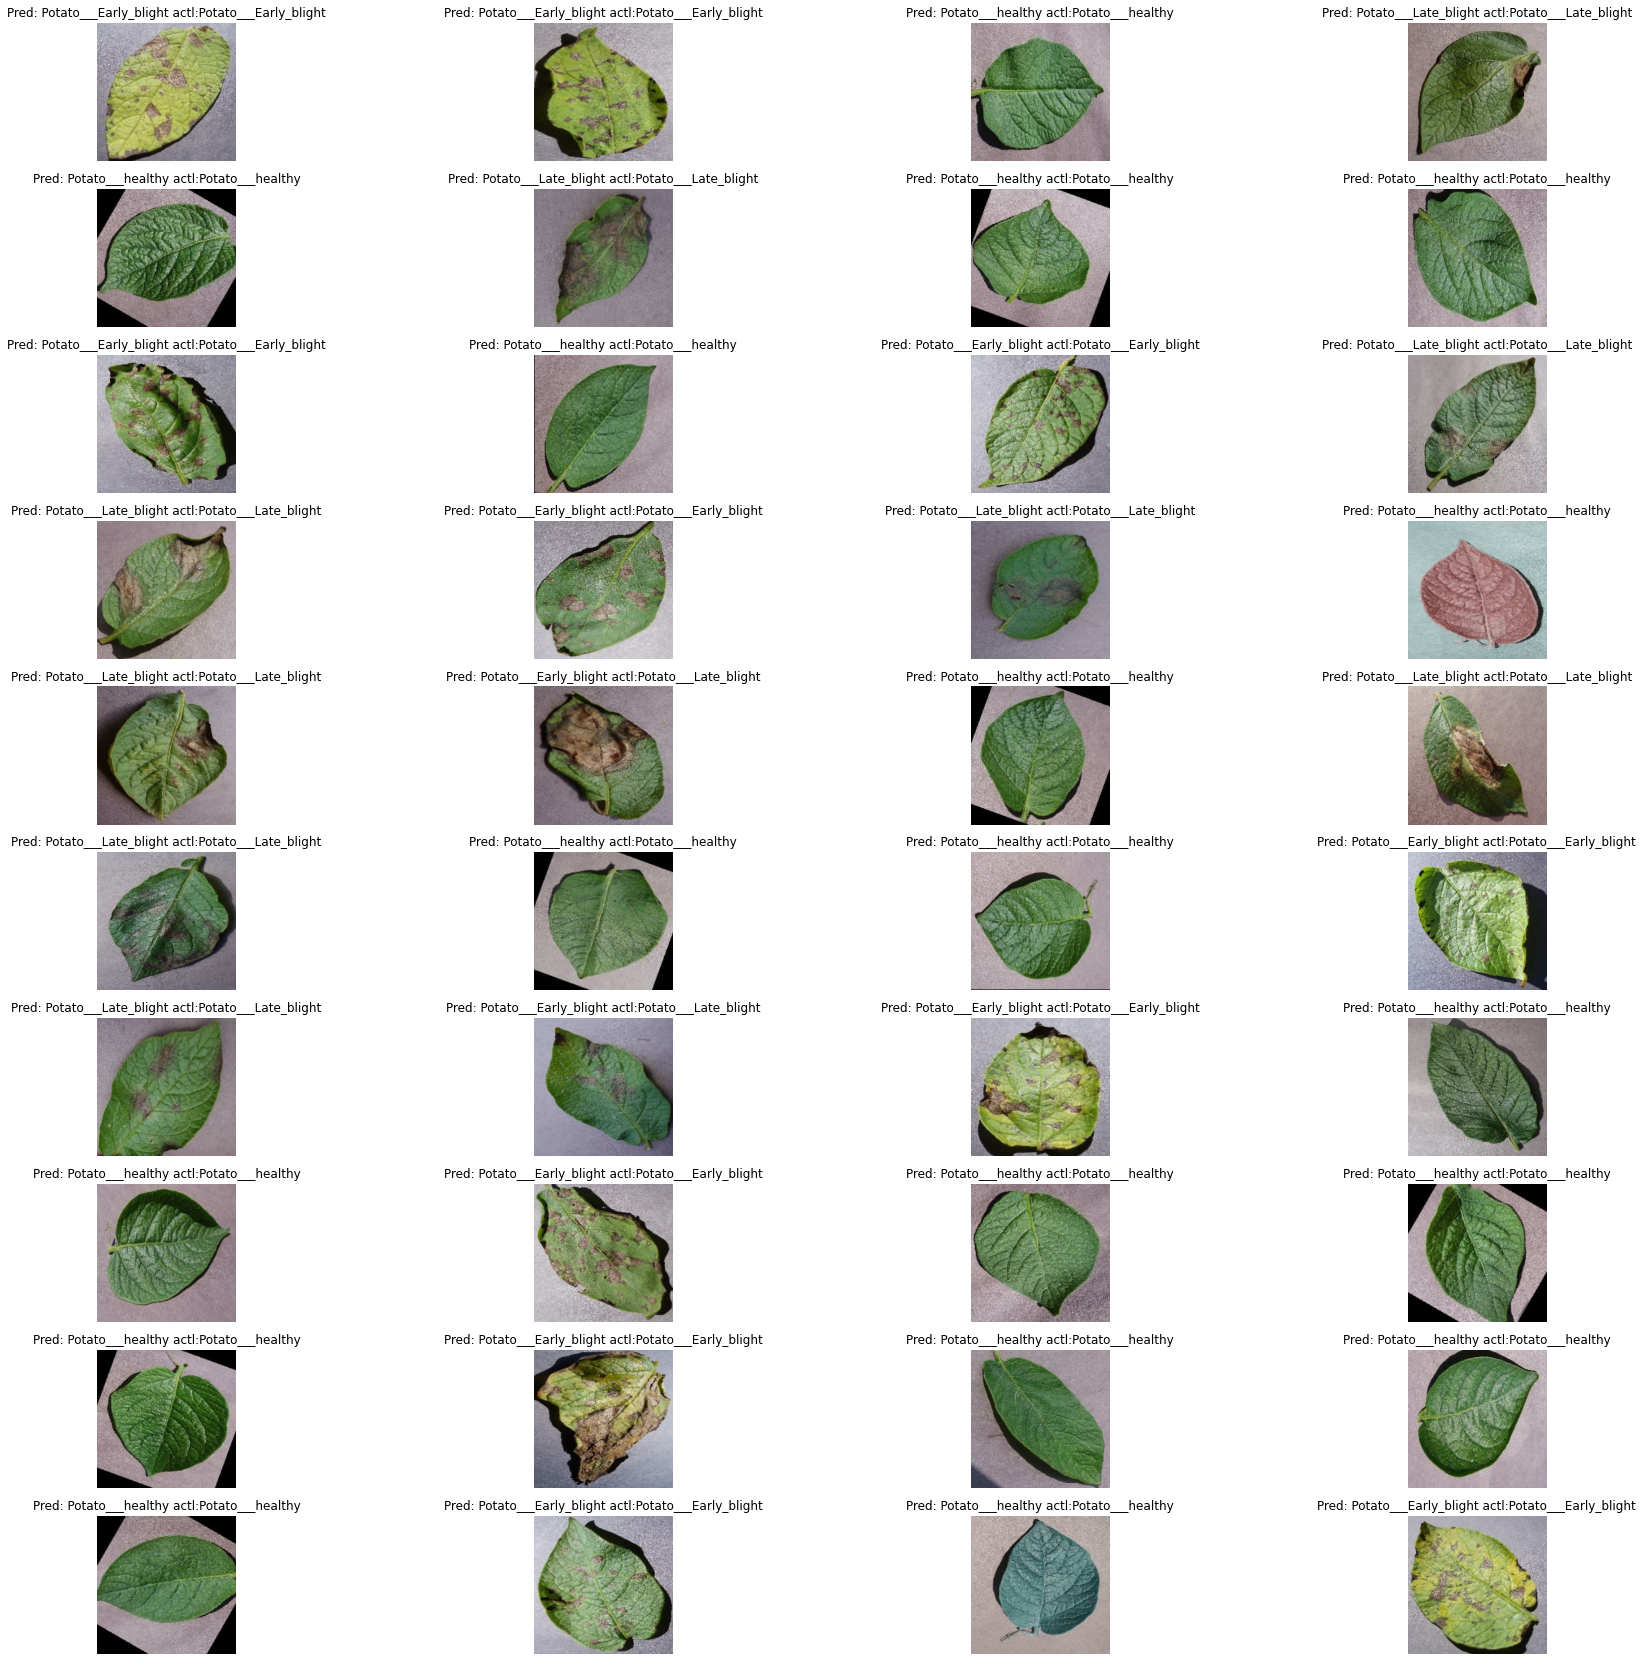

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = model_potato.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')

Saving early-blight-potato.jpg to early-blight-potato.jpg
Saving early-blight-potato-2.jpg to early-blight-potato-2.jpg
Saving early-blight-potato-3.jpg to early-blight-potato-3.jpg
Saving healthy-potato.jpg to healthy-potato.jpg
Saving healthy-potato-2.jpg to healthy-potato-2.jpg
Saving healthy-potato-3.jpg to healthy-potato-3.jpg
Saving late-blight-potato.jpeg to late-blight-potato.jpeg
Saving late-blight-potato-2.jpg to late-blight-potato-2.jpg


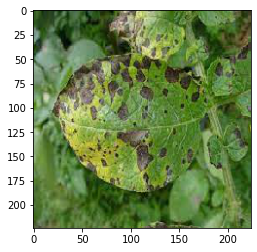


Pic name: early-blight-potato.jpg
Prediction: Potato___Early_blight


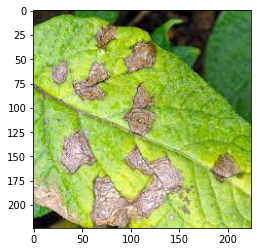


Pic name: early-blight-potato-2.jpg
Prediction: Potato___Early_blight


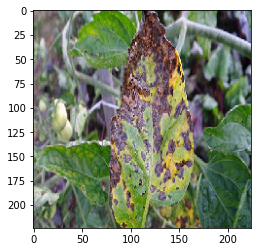


Pic name: early-blight-potato-3.jpg
Prediction: Potato___Early_blight


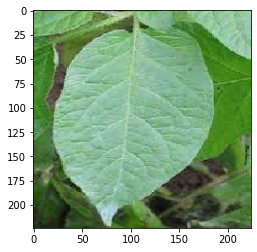


Pic name: healthy-potato.jpg
Prediction: Potato___Early_blight


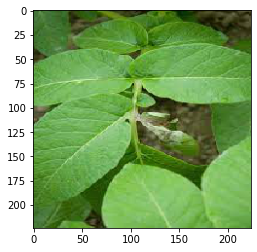


Pic name: healthy-potato-2.jpg
Prediction: Potato___Late_blight


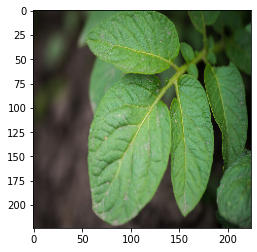


Pic name: healthy-potato-3.jpg
Prediction: Potato___Late_blight


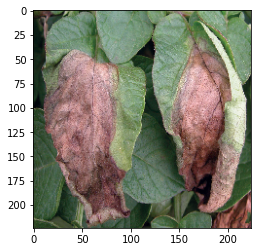


Pic name: late-blight-potato.jpeg
Prediction: Potato___Late_blight


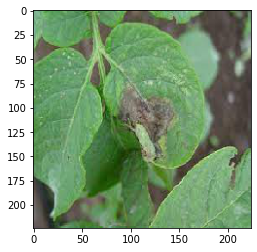


Pic name: late-blight-potato-2.jpg
Prediction: Potato___Late_blight


In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_potato.predict(images, batch_size=10)
  classes = np.argmax(classes)
  label = os.listdir(potato_train_dir)
  
  plt.imshow(img)
  plt.show()
  print('\nPic name: {}'.format(fn))
  print('Prediction: {}'.format(label[classes]))

### **Simple CNN**

In [ ]:
# defining cnn
model_potato_2 = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
from keras import optimizers
model_potato_2.compile(loss = 'categorical_crossentropy',
              # optimizer = optimizers.SGD(lr=0.001, momentum=0.9, decay=0.005),
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history_2 = model_potato_2.fit(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = len(validation_generator),
    verbose = 2
)

Epoch 1/10
90/90 - 18s - loss: 0.5455 - accuracy: 0.7859 - val_loss: 0.6285 - val_accuracy: 0.7553
Epoch 2/10
90/90 - 17s - loss: 0.1687 - accuracy: 0.9353 - val_loss: 0.5259 - val_accuracy: 0.7532
Epoch 3/10
90/90 - 17s - loss: 0.0902 - accuracy: 0.9672 - val_loss: 0.1189 - val_accuracy: 0.9607
Epoch 4/10
90/90 - 17s - loss: 0.0609 - accuracy: 0.9783 - val_loss: 0.1055 - val_accuracy: 0.9628
Epoch 5/10
90/90 - 17s - loss: 0.0658 - accuracy: 0.9769 - val_loss: 0.0728 - val_accuracy: 0.9741
Epoch 6/10
90/90 - 17s - loss: 0.0339 - accuracy: 0.9870 - val_loss: 0.0180 - val_accuracy: 0.9944
Epoch 7/10
90/90 - 17s - loss: 0.0280 - accuracy: 0.9905 - val_loss: 0.0204 - val_accuracy: 0.9916
Epoch 8/10
90/90 - 17s - loss: 0.0198 - accuracy: 0.9928 - val_loss: 0.0300 - val_accuracy: 0.9909
Epoch 9/10
90/90 - 17s - loss: 0.0177 - accuracy: 0.9940 - val_loss: 0.0700 - val_accuracy: 0.9839
Epoch 10/10
90/90 - 17s - loss: 0.0287 - accuracy: 0.9904 - val_loss: 0.0254 - val_accuracy: 0.9902


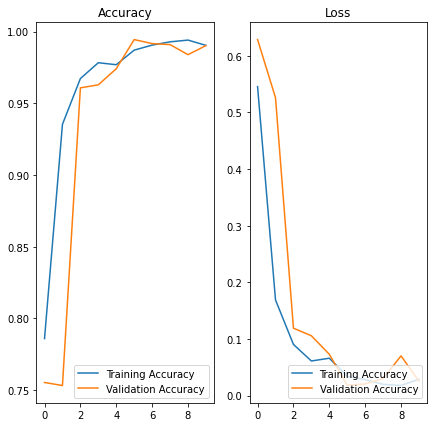

In [ ]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Accuracy')
plt.plot(epochs_range, val_loss, label='Validation Accuracy')
plt.title('Loss')
plt.legend(loc='lower right')
plt.show()

**Model Evaluation**

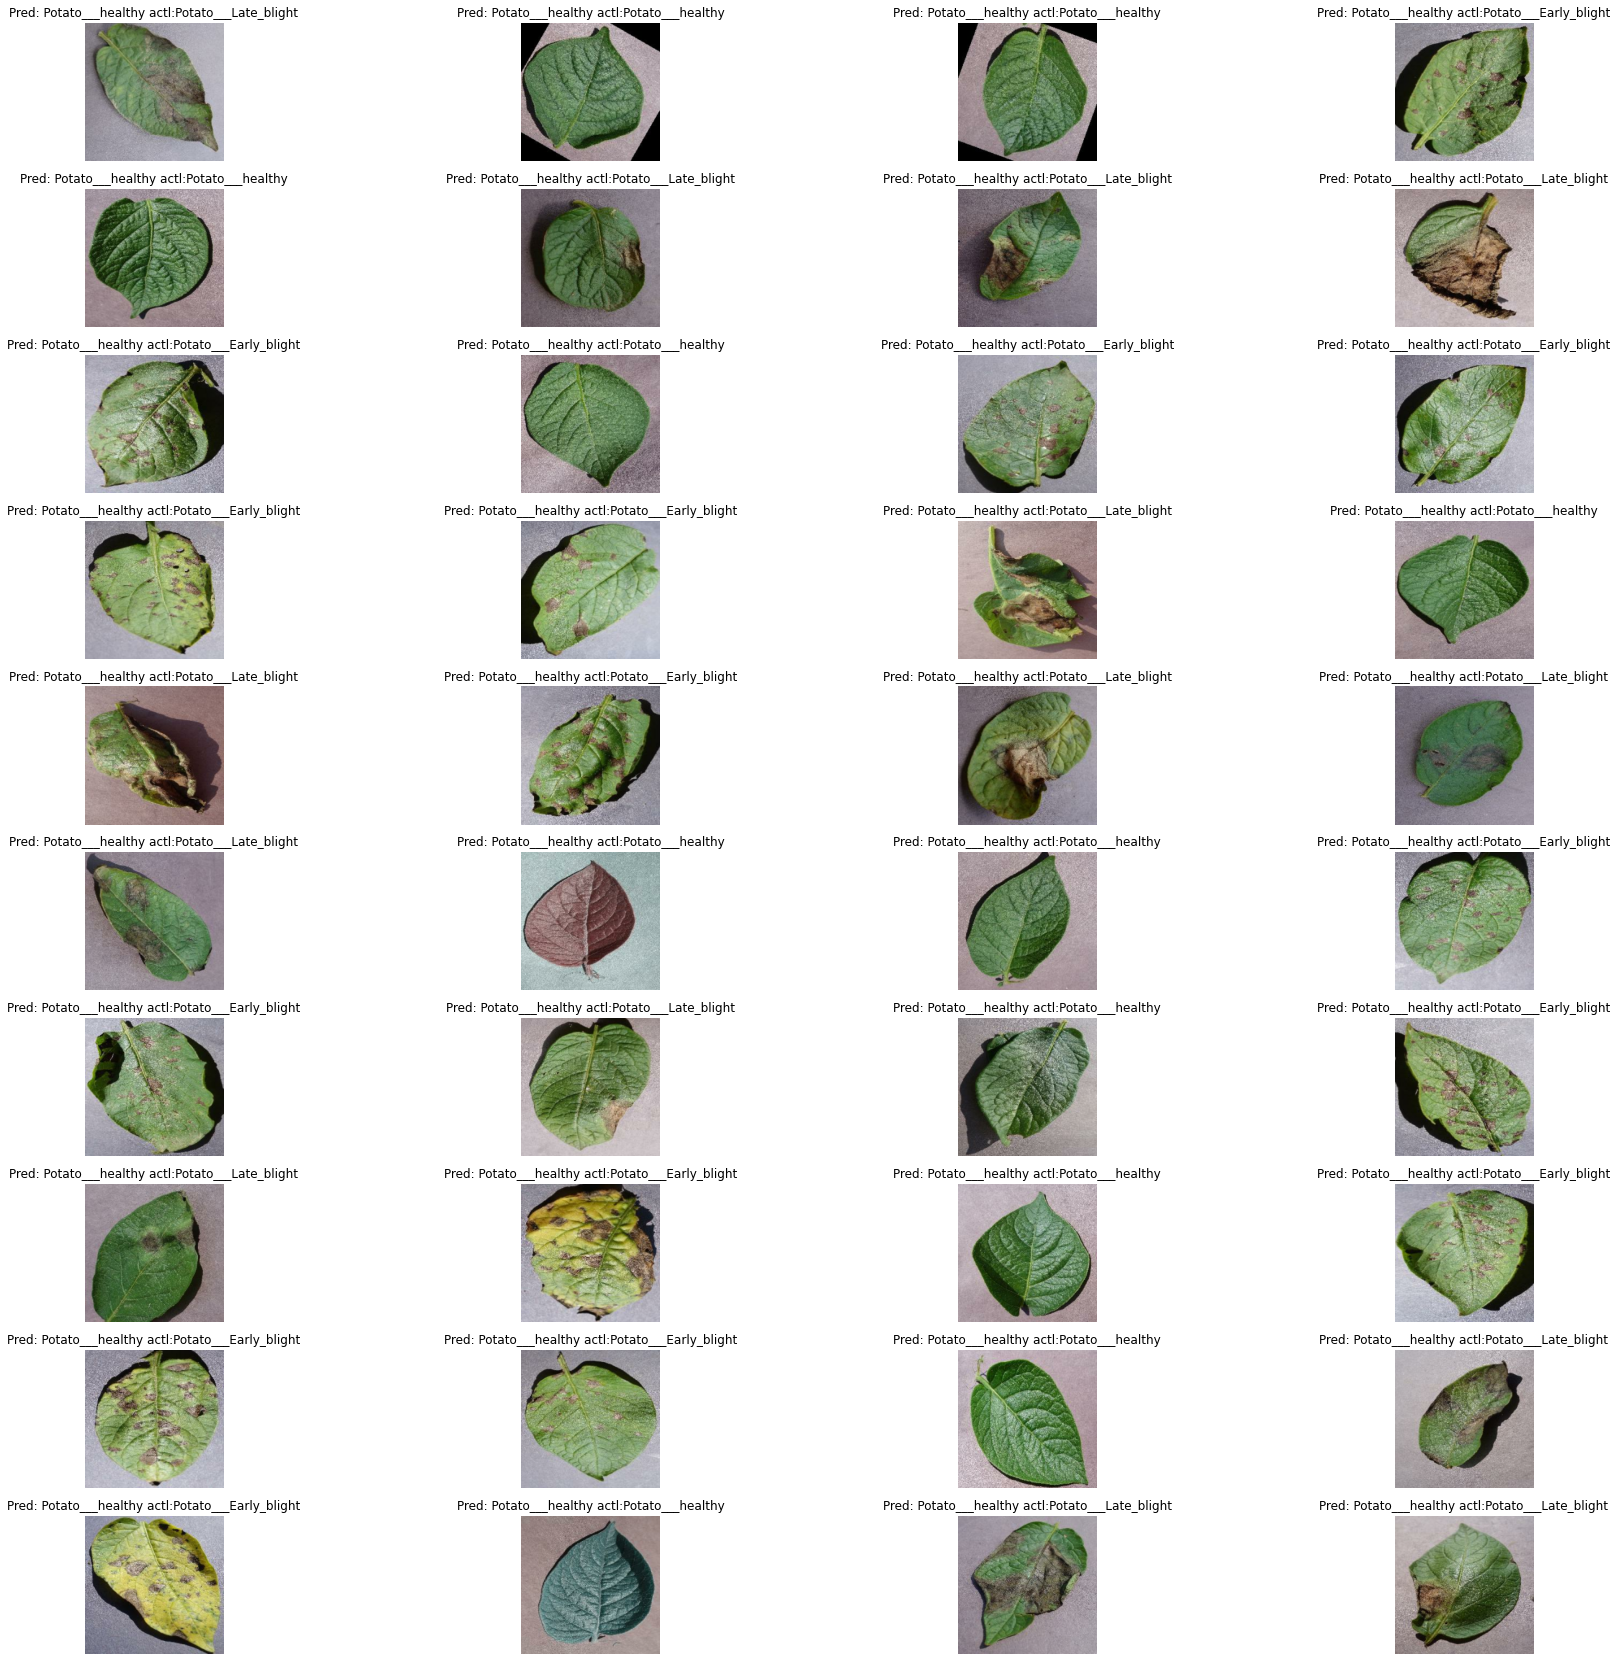

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = model_potato_2.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_potato_2.predict(images, batch_size=10)
  classes = np.argmax(classes)
  label = os.listdir(potato_train_dir)
  
  print('\nPic name: {}'.format(fn))
  print('Prediction: {}'.format(label[classes]))

Saving early-blight-potato.jpg to early-blight-potato (1).jpg
Saving early-blight-potato-2.jpg to early-blight-potato-2 (1).jpg
Saving early-blight-potato-3.jpg to early-blight-potato-3 (1).jpg
Saving healthy-potato.jpg to healthy-potato (1).jpg
Saving healthy-potato-2.jpg to healthy-potato-2 (1).jpg
Saving healthy-potato-3.jpg to healthy-potato-3 (1).jpg
Saving late-blight-potato.jpeg to late-blight-potato (1).jpeg
Saving late-blight-potato-2.jpg to late-blight-potato-2 (1).jpg

Pic name: early-blight-potato.jpg
Prediction: Potato___healthy

Pic name: early-blight-potato-2.jpg
Prediction: Potato___healthy

Pic name: early-blight-potato-3.jpg
Prediction: Potato___healthy

Pic name: healthy-potato.jpg
Prediction: Potato___healthy

Pic name: healthy-potato-2.jpg
Prediction: Potato___healthy

Pic name: healthy-potato-3.jpg
Prediction: Potato___healthy

Pic name: late-blight-potato.jpeg
Prediction: Potato___healthy

Pic name: late-blight-potato-2.jpg
Prediction: Potato___healthy


## **Save model**

In [ ]:
model_potato.save('model_potato_1.h5')

In [ ]:
!pip install tensorflowjs
!tensorflowjs_converter \
    --input_format=keras \
    model_potato_1.h5 \
    /tmp/my_tfjs_model_potato_1

     |████████████████████████████████| 71kB 4.2MB/s 
     |████████████████████████████████| 112kB 7.1MB/s 
  Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0
2021-06-02 10:56:45.631351: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [ ]:
!zip -r /tmp/potato.zip /tmp/my_tfjs_model_potato_1

  adding: tmp/my_tfjs_model_potato_1/ (stored 0%)
  adding: tmp/my_tfjs_model_potato_1/group1-shard1of10.bin (deflated 7%)
  adding: tmp/my_tfjs_model_potato_1/group1-shard7of10.bin (deflated 7%)
  adding: tmp/my_tfjs_model_potato_1/group1-shard10of10.bin (deflated 7%)
  adding: tmp/my_tfjs_model_potato_1/group1-shard5of10.bin (deflated 7%)
  adding: tmp/my_tfjs_model_potato_1/model.json (deflated 84%)
  adding: tmp/my_tfjs_model_potato_1/group1-shard6of10.bin (deflated 7%)
  adding: tmp/my_tfjs_model_potato_1/group1-shard8of10.bin (deflated 7%)
  adding: tmp/my_tfjs_model_potato_1/group1-shard9of10.bin (deflated 7%)
  adding: tmp/my_tfjs_model_potato_1/group1-shard3of10.bin (deflated 7%)
  adding: tmp/my_tfjs_model_potato_1/group1-shard2of10.bin (deflated 7%)
  adding: tmp/my_tfjs_model_potato_1/group1-shard4of10.bin (deflated 7%)


In [ ]:
from google.colab import files
files.download("/tmp/potato.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **JSON Response**

In [ ]:
potato_prediction = tf.keras.models.load_model('model_potato_1.h5')

NameError: ignored

In [ ]:
from keras.preprocessing import image

img = image.load_img('late-blight-potato.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])

prediction = potato_prediction.predict(images.tolist())
confidence = '%.3f'%(np.amax(prediction)*100)
disease = class_names[np.argmax(prediction)]

In [ ]:
disease, confidence

('Potato___Late_blight', '67.911')

In [ ]:
import json
response_json = {
        "disease" : disease,
        "confidence" : str(confidence) + '%'
    }
aaa = json.dumps(response_json)

In [ ]:
aaa

'{"disease": "Potato___Late_blight", "confidence": "67.911%"}'